In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\BCW\BCW_NN_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5.0,1.0,1.0,1.0,NaN,1.0,3.0,1.0,1.0
1,NaN,4.0,4.0,5.0,NaN,10.0,3.0,2.0,1.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,NaN
3,6.0,8.0,NaN,1.0,3.0,4.0,3.0,7.0,1.0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
678,3.0,1.0,1.0,NaN,2.0,NaN,2.0,NaN,1.0
679,NaN,1.0,NaN,1.0,NaN,1.0,3.0,1.0,1.0
680,5.0,10.0,10.0,10.0,4.0,10.0,NaN,6.0,3.0
681,1.0,1.0,NaN,3.0,2.0,1.0,1.0,1.0,1.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	235
float64		column 2	33
float64		column 3	132
float64		column 4	132
float64		column 5	99
float64		column 6	169
float64		column 7	136
float64		column 8	132
float64		column 9	136


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,448.000000,650.000000,551.000000,551.000000,584.000000,514.000000,547.000000,551.000000,547.000000
mean,4.345982,3.069231,3.038113,2.602541,3.142123,3.254864,3.361974,2.724138,1.515539
std,2.459230,2.996116,2.814960,2.634028,2.114722,3.404393,2.296011,2.908317,1.643401
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,5.000000,4.000000,4.000000,3.000000,4.000000,5.000000,4.000000,3.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


<AxesSubplot:>

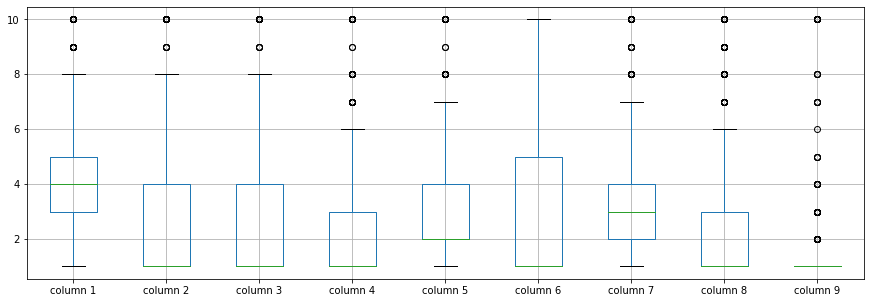

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    4.345982
column 2    3.069231
column 3    3.038113
column 4    2.602541
column 5    3.142123
column 6    3.254864
column 7    3.361974
column 8    2.724138
column 9    1.515539
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,0.581488,0.533628,0.391656,0.437021,0.503133,0.480364,0.462997,0.307652
column 2,0.581488,1.000000,0.900838,0.684695,0.731601,0.656518,0.719701,0.707274,0.418713
column 3,0.533628,0.900838,1.000000,0.635951,0.726052,0.634164,0.713515,0.693758,0.367440
column 4,0.391656,0.684695,0.635951,1.000000,0.538950,0.689956,0.606453,0.603978,0.457938
column 5,0.437021,0.731601,0.726052,0.538950,1.000000,0.492160,0.598439,0.576805,0.512428
column 6,0.503133,0.656518,0.634164,0.689956,0.492160,1.000000,0.600447,0.503955,0.373946
column 7,0.480364,0.719701,0.713515,0.606453,0.598439,0.600447,1.000000,0.637495,0.317968
column 8,0.462997,0.707274,0.693758,0.603978,0.576805,0.503955,0.637495,1.000000,0.405807
column 9,0.307652,0.418713,0.367440,0.457938,0.512428,0.373946,0.317968,0.405807,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [14]:
imputer = md.Midas(layer_structure = [9,9+17,9+17+17,9+17+17,9+17+17+17+17,9+17+17+17+17+17,9+17+17+17+17+17+17,9+17+17+17+17+17,9+17+17+17+17,9+17+17+17,9+17+17,9+17,9], vae_layer = False, seed = 170)
imputer.build_model(df)
imputer.train_model(training_epochs=50)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 27.77505197979155
Epoch: 1 , loss: 27.780331838698615
Epoch: 2 , loss: 27.6677919115339
Epoch: 3 , loss: 27.676231384277344
Epoch: 4 , loss: 27.753675506228493
Epoch: 5 , loss: 27.192176818847656
Epoch: 6 , loss: 25.830100559052966
Epoch: 7 , loss: 24.496194067455473
Epoch: 8 , loss: 24.10089570000058
Epoch: 9 , loss: 23.572224594297865
Epoch: 10 , loss: 23.36632353918893
Epoch: 11 , loss: 23.032704035441082
Epoch: 12 , loss: 22.950820718492782
Epoch: 13 , loss: 22.329133374350413
Epoch: 14 , loss: 22.378178619203112
Epoch: 15 , loss: 22.176327659970237
Epoch: 16 , loss: 21.965375060126895
Epoch: 17 , loss: 21.633435272035143
Epoch: 18 , loss: 21.58627662204561
Epoch: 19 , loss: 21.434620789119176
Epoch: 20 , loss: 21.35701813016619
Epoch: 21 , loss: 21.5580967040289
Epoch: 22 , loss: 21.539650054205033
Epoch: 23 , loss: 21.47353944324312
Epoch: 24 , loss: 21.132425557999383
Epoch: 25 , loss: 21.3630876

In [15]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(683, 9)

In [16]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    0.892714
column 2    1.000000
column 3    0.776391
column 4    1.000000
column 5    0.779797
column 6    1.000000
column 7    2.000000
column 8    1.000000
column 9    1.000000
Name: 21, dtype: float64

In [17]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\BCW.xlsx', header=None,names=column_names)

In [18]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.000000,0.0,0.000000,0.000000,-1.482174,0.000000,0.000000,0.000000,0.000000
1,-1.244208,0.0,0.000000,0.000000,-3.996407,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.277348
3,0.000000,0.0,-5.607992,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
678,0.000000,0.0,0.000000,-0.176831,0.000000,-0.120772,0.000000,-0.095063,0.000000
679,0.192271,0.0,0.677181,0.000000,-0.170952,0.000000,0.000000,0.000000,0.000000
680,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,-4.444071,0.000000,0.000000
681,0.000000,0.0,0.599926,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Calculating NRMSE Value

In [19]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [20]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [21]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(141.4016731355837, 335.3281974424459)

In [22]:
NRMS=numerator/denominator
NRMS


0.4216814279683509

In [23]:
new_df.iloc[66,:]

column 1    1.491360
column 2    3.000000
column 3    3.000000
column 4    2.000000
column 5    2.000000
column 6    1.073931
column 7    7.000000
column 8    2.000000
column 9    0.730161
Name: 66, dtype: float64

In [24]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5.000000,1.0,1.000000,1.000000,0.517826,1.000000,3.000000,1.000000,1.000000
1,3.755792,4.0,4.000000,5.000000,3.003593,10.000000,3.000000,2.000000,1.000000
2,3.000000,1.0,1.000000,1.000000,2.000000,2.000000,3.000000,1.000000,0.722652
3,6.000000,8.0,2.392008,1.000000,3.000000,4.000000,3.000000,7.000000,1.000000
4,4.000000,1.0,1.000000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...
678,3.000000,1.0,1.000000,0.823169,2.000000,0.879228,2.000000,0.904937,1.000000
679,2.192271,1.0,1.677181,1.000000,1.829048,1.000000,3.000000,1.000000,1.000000
680,5.000000,10.0,10.000000,10.000000,4.000000,10.000000,0.555929,6.000000,3.000000
681,1.000000,1.0,1.599926,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
imputations[-1].to_excel("BCW_NN_20(imp).xlsx", index=False, header=False)